# GHZ state preparation

In [1]:
import qiskit
# from equal1.benchmarking import qiskit_wrapper
# from equal1.benchmarking import qbraid_wrapper
# import qiskit.circuit
import matplotlib.pyplot as plt
import numpy as np
from equal1.benchmarking.algorithms.ghzstate import GHZStateIndividual 
import pandas as pd
import seaborn as sns

In [2]:
import qbraid
provider = qbraid.QbraidProvider()
device = "equal1_simulator"
device = provider.get_device(device)
device.profile.model_dump()



/home/nmurphy/sources/projects/equal1_qbraid/equal1-benchmarking/.venv/lib/python3.13/site-packages/qbraid/runtime/native/provider.py:151: RuntimeWarning: The default runtime configuration for device 'equal1_simulator' includes transpilation to program type 'cudaq', which is not registered.
  warnings.warn(


{'device_id': 'equal1_simulator',
 'simulator': True,
 'experiment_type': <ExperimentType.GATE_MODEL: 'gate_model'>,
 'num_qubits': 50,
 'program_spec': <ProgramSpec('builtins.str', 'qasm2')>,
 'provider_name': 'Equal1',
 'basis_gates': None,
 'noise_models': NoiseModelSet(['hpc-gamma1', 'bell1-6-noiseless', 'bell1-6', 'bell1-6-no-spam', 'hpc-gamma2', 'bell2-17-gen-preview', 'hpc-conservative', 'ideal']),
 'name': 'equal1_simulator',
 'pricing': None}

In [3]:
hardware = {'hpc-conservative':"Current Device extrapolated", 'hpc-gamma1': "32 Qubit QPU", 'hpc-gamma2': "167 Qubit QPU"}


In [4]:
#all_experiments = [GHZStateIndividual(n_qubits=q, device_name="bell2-17-gen-preview") for q in range(2, 7, 2)]
all_experiments = [GHZStateIndividual(n_qubits=q, device_name=device_name) for q in range(2, 17, 2) for device_name in hardware.keys()]
results  = []
for individual in all_experiments:
    individual.run(simulate=True,  runtime_options={"backend":"TensorNet_MPS", "simulation_platform":"GPU"})
    individual.collect_results()
    fid = individual.analyse_results()
    row = {"n_qubits": individual.n_qubits, "device": individual.device_name, "fidelity": fid}
    print(f"Running for {individual.n_qubits} qubits, device={individual.device_name} results: {fid}")
    results.append(row)


df = pd.DataFrame.from_dict(results)
df.to_csv("ghz_state.csv")


TensorNet_MPS
Running for 2 qubits, device=hpc-conservative results: 1.0937345254159083
TensorNet_MPS
Running for 2 qubits, device=hpc-gamma1 results: 1.1063864670653558
TensorNet_MPS
Running for 2 qubits, device=hpc-gamma2 results: 1.1055129803811388
TensorNet_MPS
Running for 4 qubits, device=hpc-conservative results: 1.021101876324411
TensorNet_MPS
Running for 4 qubits, device=hpc-gamma1 results: 1.0428046856724684
TensorNet_MPS
Running for 4 qubits, device=hpc-gamma2 results: 1.0443833233328235
TensorNet_MPS
Running for 6 qubits, device=hpc-conservative results: 0.956191324046092
TensorNet_MPS
Running for 6 qubits, device=hpc-gamma1 results: 0.9916529811741708
TensorNet_MPS
Running for 6 qubits, device=hpc-gamma2 results: 1.0020604393154782
TensorNet_MPS
Running for 8 qubits, device=hpc-conservative results: 0.9111870207360426
TensorNet_MPS
Running for 8 qubits, device=hpc-gamma1 results: 0.9506205090293829
TensorNet_MPS
Running for 8 qubits, device=hpc-gamma2 results: 0.96167496052

Text(0.5, 1.0, 'GHZ State Fidelity vs Number of Qubits')

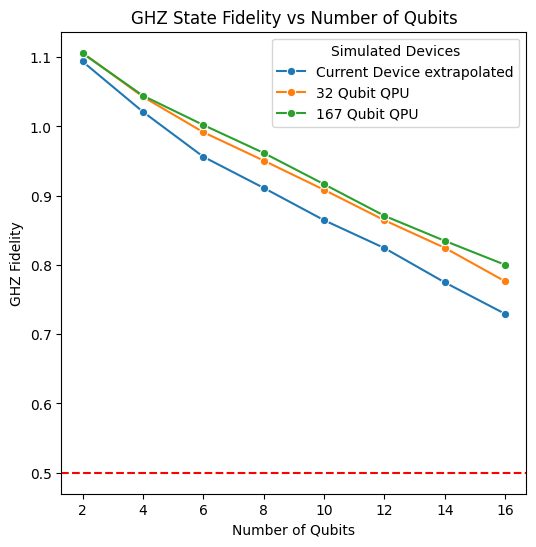

In [5]:
fig, ax = plt.subplots(figsize=(6, 6))
df["label"] = df["device"].map(hardware)

sns.lineplot(data=df, x="n_qubits", y="fidelity", hue="label", marker="o", ax=ax)
ax.axhline(0.5, ls='--', color='red')
ax.set_ylabel("GHZ Fidelity")
ax.legend(title="Simulated Devices")

ax.set_xlabel("Number of Qubits")
ax.set_title("GHZ State Fidelity vs Number of Qubits")